Exercise 1: Duplicate Detection and Removal


In [2]:
import pandas as pd
titanic_dataset = pd.read_csv("train.csv")
print(titanic_dataset)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [3]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# to identify if there are any duplicate rows based on all columns.
titanic_dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
# To show rows which have duplicates among all columns
titanic_dataset[titanic_dataset.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [12]:
rows = len(titanic_dataset)
print(f" Number of rows: {rows}")

 Number of rows: 891


In [14]:
titanic_dataset.drop_duplicates(inplace = True)

In [17]:
rows_no_duplicates = len(titanic_dataset)
print(f" Number of rows: {rows_no_duplicates} after removing duplicates")

 Number of rows: 891 after removing duplicates


 Exercise 2: Handling Missing Values

In [ ]:
# To check all missing values in our dataset (bool)
pd.isna(titanic_dataset)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# To check the number of  missing values in each column
# Column "Age" has 177 missing values, "Cabin" - 687 missing values and "Embarked" - 2 missing values
pd.isna(titanic_dataset).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
# Missing values in the column "Cabin" will be replaces with "Deck"
titanic_dataset["Cabin"].fillna("Deck")

0      Deck
1       C85
2      Deck
3      C123
4      Deck
       ... 
886    Deck
887     B42
888    Deck
889    C148
890    Deck
Name: Cabin, Length: 891, dtype: object

In [55]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Deck,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Deck,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Deck,S


In [28]:
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
# Creating an imputer which will help us to generate a mean age among all non-missing values and  use it in order to replce all missing values in column "Age"
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')

In [ ]:
titanic_dataset["Age"] = imputer.fit_transform(titanic_dataset[["Age"]])
titanic_dataset["Age"] = titanic_dataset["Age"].round(1)



In [57]:
titanic_dataset.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Deck,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Deck,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Deck,S
5,6,0,3,"Moran, Mr. James",male,29.7,0,0,330877,8.4583,Deck,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,Deck,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,Deck,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,Deck,C


In [ ]:
# Checking how many missing values are still in the dataset
pd.isna(titanic_dataset).sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [ ]:
# Using dropna function to remove all missing values that are not crucial for the analysis
titanic_dataset.dropna(inplace = True)

In [ ]:
# Checking if there are still missing values in the dataset -> no missing values left
pd.isna(titanic_dataset).sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
# checking unique values in order to make sure we have correct information in all columns
titanic_dataset.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         680
Fare           247
Cabin          147
Embarked         3
dtype: int64

Exercise 3: Feature Engineering

In [65]:
titanic_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Deck,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Deck,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Deck,S,1
5,6,0,3,"Moran, Mr. James",male,29.7,0,0,330877,8.4583,Deck,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,Deck,S,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,Deck,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,Deck,C,2


In [86]:
# Create FamilySize feature (SibSp + Parch + 1 for self)
titanic_dataset['Family Size'] = titanic_dataset['SibSp'] + titanic_dataset['Parch'] + 1

In [114]:
titanic_dataset["Title"] = titanic_dataset["Name"].str.extract(r",\s*([^\.]+)\.", expand=False).str.strip()
titanic_dataset["Title"].unique()



array(['Mr', 'Miss', 'Mrs', 'Master', 'Don', 'Rev', 'Dr', 'Ms', 'Major',
       'Lady', 'Sir', 'Col', 'Mlle', 'Jonkheer'], dtype=object)

In [109]:
rare_titles = ["Lady","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer"]
titanic_dataset["Title"] =titanic_dataset["Title"].replace({
    "Mlle":"Miss",
    "Ms":"Miss",
    "Mme":"Mrs",
    **{title: "Rare" for  title in rare_titles}
})


In [108]:
titanic_dataset["Title"].unique()

array(['Mr', 'Miss', 'Mrs', 'Master', 'Don', 'Rev', 'Dr', 'Major', 'Lady',
       'Sir', 'Col', 'Jonkheer'], dtype=object)

In [ ]:
# def extract_title(full_name):
#     return full_name.split(", ")[1].split(".")[0]

In [ ]:
# titanic_dataset["Title"] = titanic_dataset["Name"].apply(extract_title)

In [ ]:
# titanic_dataset["Title"].value_counts()

Title
Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [115]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Family Size,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Deck,2,True,False,True,False,True,False,False,Mr
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Deck,1,False,False,True,True,False,False,False,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,2,False,False,True,False,False,True,False,Mrs
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Deck,1,True,False,True,False,True,False,False,Mr
5,6,0,3,"Moran, Mr. James",29.7,0,0,330877,8.4583,Deck,1,True,True,False,False,True,False,False,Mr


In [120]:
print(titanic_dataset.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Family Size', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir']


In [122]:
categorical_cols = ["Sex", "Embarked", "Title"]

# keep only those that really exist in your DataFrame
cols_to_encode = [col for col in categorical_cols if col in titanic_dataset.columns]

print("Encoding:", cols_to_encode)

titanic_dataset = pd.get_dummies(titanic_dataset, columns=cols_to_encode, drop_first=True)


Encoding: []


In [79]:
# Creating a boxplot for Age column
import seaborn as sns
import matplotlib.pyplot as plt


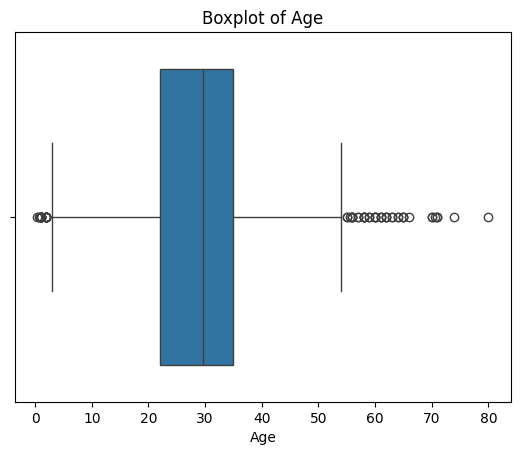

In [80]:
# Creating a boxplot for Age column
sns.boxplot(x=titanic_dataset["Age"])

plt.title("Boxplot of Age")
plt.xlabel("Age")
plt.show()

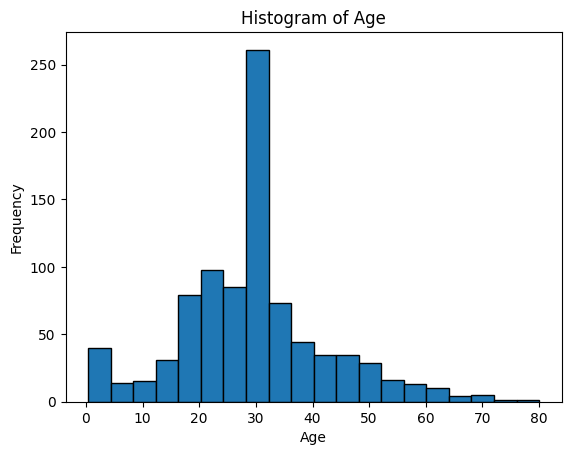

In [81]:
plt.hist(titanic_dataset["Age"], bins=20, edgecolor="black")
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [85]:
Q1 = titanic_dataset['Fare'].quantile(0.25)
Q3 = titanic_dataset['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
titanic_dataset = titanic_dataset[(titanic_dataset['Fare'] >= lower_bound) & (titanic_dataset['Fare'] <= upper_bound)]